In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

In [2]:
plt.rcParams['text.usetex'] = True

# TIME_LIMIT = 7200
TIME_LIMIT = 18000

In [4]:
inst_columns = ["INSTANCE"]
results_columns = ["ALGO", "DIMENSION", "INST_TYPE", "DUMMY", "PATH", "INSTANCE", "NODES", "EDGES", "BLUE_EDGES",
                   "RED_EDGES", "PREP_TIME", "WALL_TIME", "CPU_TIME", "SOLUTIONS", "EXTRACTIONS", "INSERTIONS",
                   "NQP_IT", "TRANSITION_ARCS_COUNT", "HOST", "DATE"]

instances = "santos_3d.inst"
multiPrimResults = "multiPrim_SANTOS_3d.csv"
multiBNResults = "multiBN_SANTOS_3d.csv"

#filename = solutionsFileName.split('.')[0]
instances_df = pd.read_csv(instances, sep=';', header=None, names=inst_columns)
prim_df = pd.read_csv(multiPrimResults, sep=';', header=None, names=results_columns)
bn_df = pd.read_csv(multiBNResults, sep=';', header=None, names=results_columns)

master_df = pd.merge(left=instances_df, right=prim_df, how='left', on="INSTANCE")
master_df = master_df.merge(right=bn_df, how='left', on="INSTANCE", suffixes=("_PRIM", "_BN"))

master_df["SPEEDUP"] = master_df["WALL_TIME_BN"]/master_df["WALL_TIME_PRIM"]
master_df["EQUIVALENT"] = master_df["SOLUTIONS_BN"] == master_df["SOLUTIONS_PRIM"]

Nodes: 5.0 GMean BN: 6.0983314541078597e-05

Nodes: 5.0 Mean BN: 7.659999999999999e-05

Nodes: 6.0 GMean BN: 0.00023133915982867805

Nodes: 6.0 Mean BN: 0.0003301500000000001

Nodes: 7.0 GMean BN: 0.0008754414782903701

Nodes: 7.0 Mean BN: 0.00126615

Nodes: 8.0 GMean BN: 0.0023502984917433685

Nodes: 8.0 Mean BN: 0.0036040000000000004

Nodes: 9.0 GMean BN: 0.011152851539957365

Nodes: 9.0 Mean BN: 0.012569999999999998

Nodes: 10.0 GMean BN: 0.04792818197930092

Nodes: 10.0 Mean BN: 0.06689463157894736

Nodes: 11.0 GMean BN: 0.11764977706385805

Nodes: 11.0 Mean BN: 0.18061485

Nodes: 12.0 GMean BN: 0.5593756144523836

Nodes: 12.0 Mean BN: 0.93710775

Nodes: 13.0 GMean BN: 2.109182109251472

Nodes: 13.0 Mean BN: 4.2074463

Nodes: 14.0 GMean BN: 15.648551915568566

Nodes: 14.0 Mean BN: 26.9137653



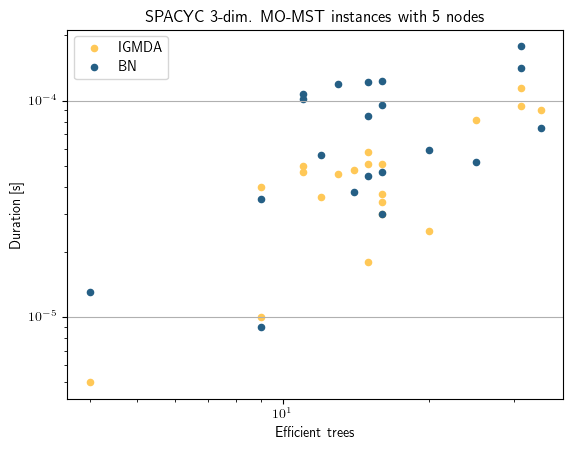

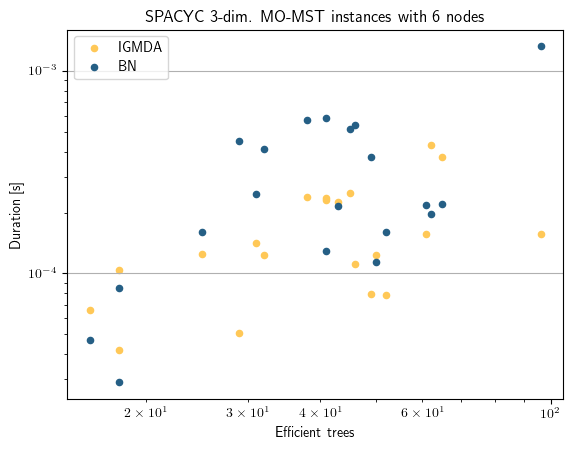

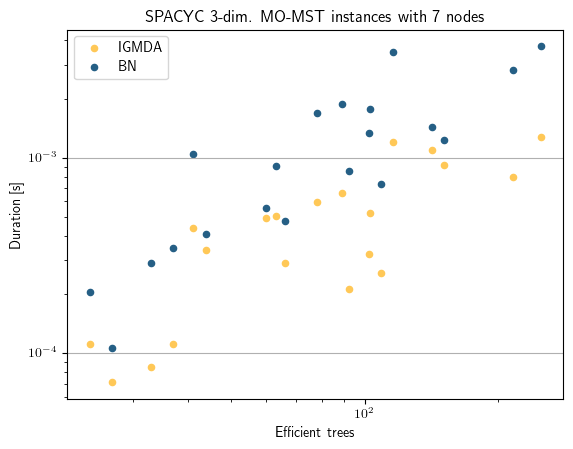

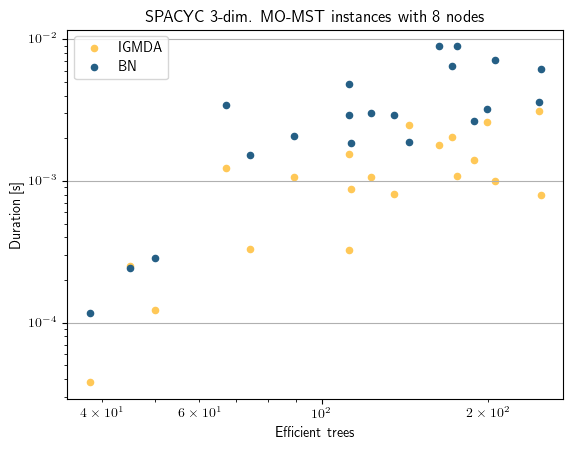

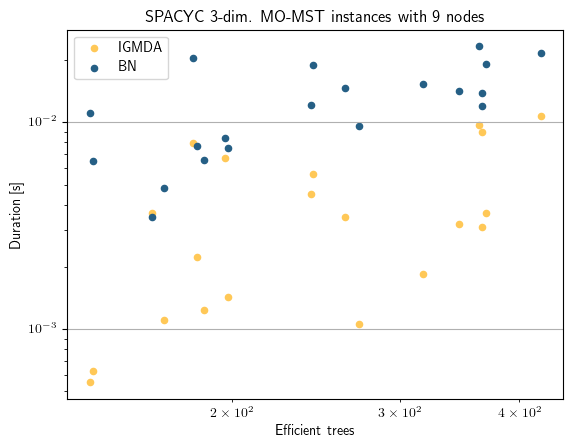

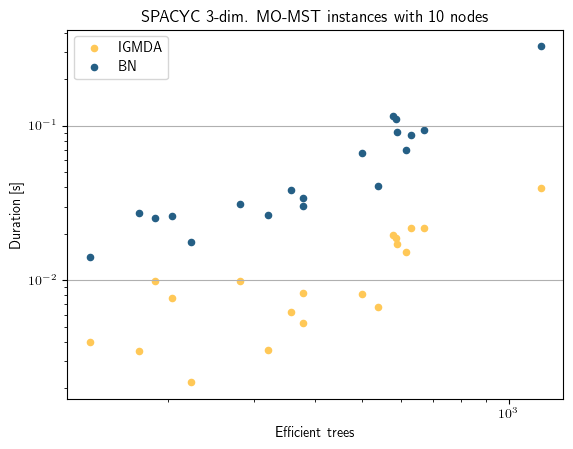

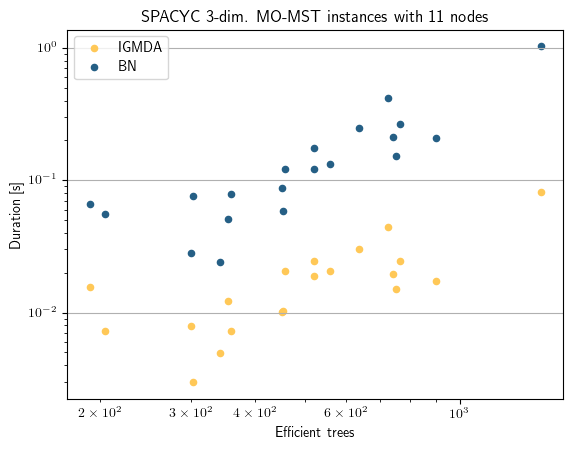

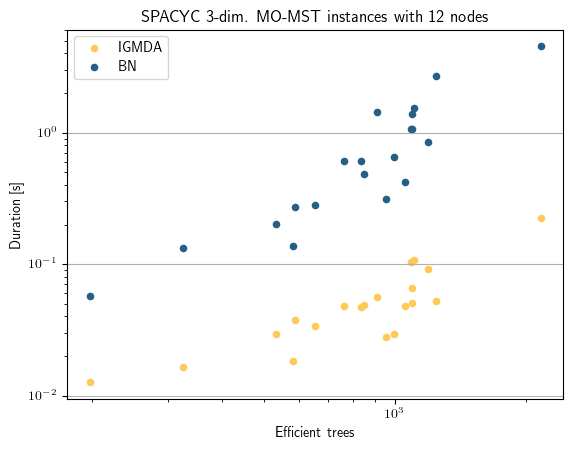

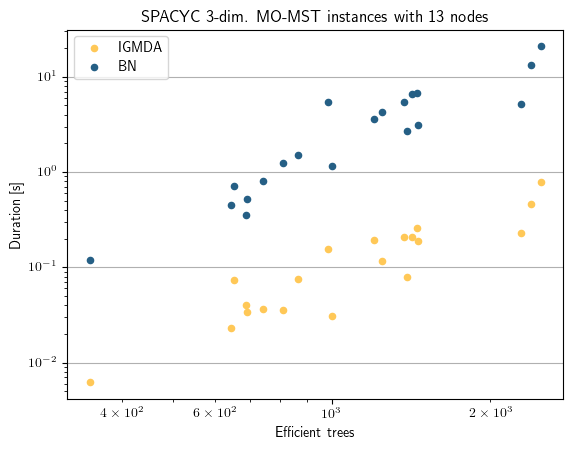

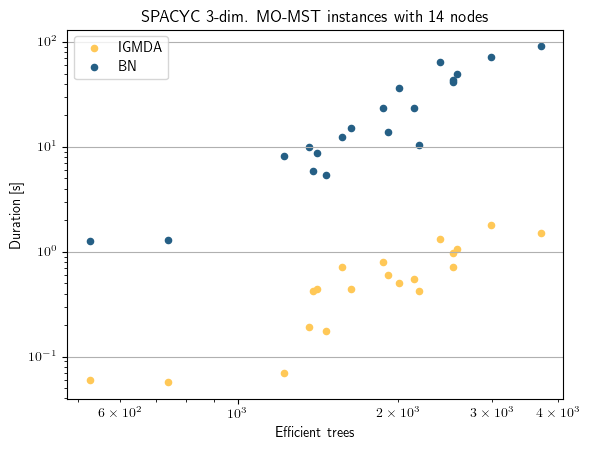

In [5]:
c1 = '#FFC857'
c2 = '#255F85'

for nodesCount, resultsByNodes in master_df.groupby(by="NODES_PRIM"):
    #print("Nodes: {} Speedup: {}\n".format(nodesCount, resultsByNodes["SPEEDUP"].mean()))
    #print("Nodes: {} Gmean Speedup: {}\n".format(nodesCount, gmean(resultsByNodes["SPEEDUP"])))
    print("Nodes: {} GMean BN: {}\n".format(nodesCount, gmean(resultsByNodes["WALL_TIME_BN"])))
    print("Nodes: {} Mean BN: {}\n".format(nodesCount, resultsByNodes["WALL_TIME_BN"].mean()))
    #BN_averages += (" {} &".format(resultsByNodes["WALL_TIME_BN"].mean().round(4)))

    ax1 = resultsByNodes.plot(kind='scatter', x="SOLUTIONS_PRIM", y='WALL_TIME_PRIM',
                        label='IGMDA', color=c1)
    ax2 = resultsByNodes.plot(kind='scatter', x="SOLUTIONS_BN", y='WALL_TIME_BN',
                        label='BN', color=c2, ax=ax1)
    ax1.yaxis.grid(True)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_xlabel("Efficient trees")
    ax1.set_ylabel("Duration [s]")
    # ax1.set_yscale('log')
    ax1.set_title("SPACYC 3-dim. MO-MST instances with {} nodes".format(int(nodesCount)))

    #plt.show()
    plt.savefig("SPACYC-{}.pdf".format(int(nodesCount)), format="pdf")